# Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2: Importing Data 

In [2]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', 
                       header = None, skipinitialspace = True)
# Note here that the data is stored without column names. We need to name those in a descriptive way
# Note also that we stripped any available white spaces in the data with the skipinitialspace attribute
adult_df.head(10) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.info() 
# Note 1:  here that missing data is taking some format other than NaNs. 
# Note 2:  All numerical columns seem to not contain missing values. However, ranges must be inspected in case missing values = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
adult_df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult_df.describe(include=['O']) 

,1,3,5,6,7,8,9,13,14
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
nrow = len(adult_df.index) # just another way to get the number of rows
print(nrow)

32561


In [8]:
adult_df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [9]:
adult_df.columns = ['age', 'workclass', 'fnlwgt' , 'education','education_num', 
                    'marital_status','occupation','relationship','race', 'gender' , 
                    'capital_gain', 'capital_loss','hours_week','country', 'income'] # setting meaningful column names

In [10]:
adult_df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Step 3: Handling Missing Values

### We need to discover the format the missing values are taking.  

In [11]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
adult_df.describe(include=['O']) # summary only for non-numerical (string) columns

,workclass,education,marital_status,occupation,relationship,race,gender,country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


 ### No missing values in numerical columns. We then take a look at the unique values in object columns.

In [13]:
obj_col = ['gender', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'country', 'income']
for col in obj_col:
    print(col)
    print(adult_df[col].value_counts(),'\n')
    

gender
Male      21790
Female    10771
Name: gender, dtype: int64 

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: i

### There are missing values in the form of '?' in three columns: workclass ,  occupation ,  country. We will replace those with NaNs.

In [14]:
adult_df.replace('?', np.nan, inplace=True)

In [15]:
# now we check again the replacement was successful
obj_col1 = ['workclass', 'occupation', 'country']
for col in obj_col1:
    print(col)
    print(adult_df[col].value_counts(),'\n')
# and check if now we have the right count of nans in these three columns
adult_df.isnull().sum()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64 

country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England   

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_week           0
country            583
income               0
dtype: int64

# Step 4: Exploratory Data Analysis

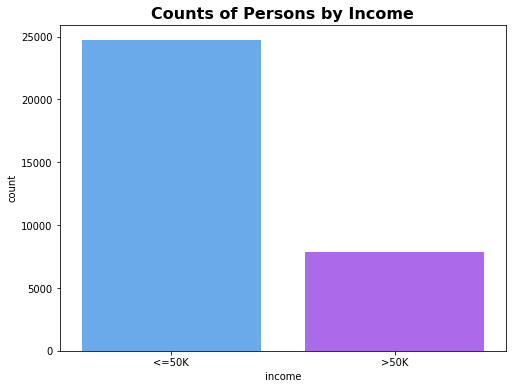

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='income', data=adult_df, palette='cool')
plt.title('Counts of Persons by Income', fontweight='bold', fontsize=16);
#plt.figtext(.1, .01,  'Fig. 1: The majority of subjects are earning less than 50k with a ratio a little over 3:1 compared to the number of subjects earning more than 50k.'); 

### The majority of subjects are earning less than 50k, with a ratio a little over 3:1 compared to the number of subjects earning more than 50k

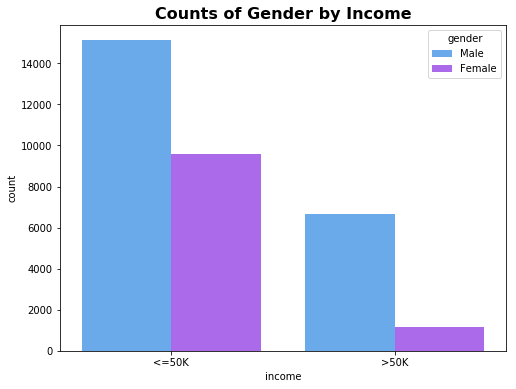

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='income', hue='gender', data=adult_df, palette='cool')
plt.title('Counts of Gender by Income', fontweight='bold', fontsize=16);

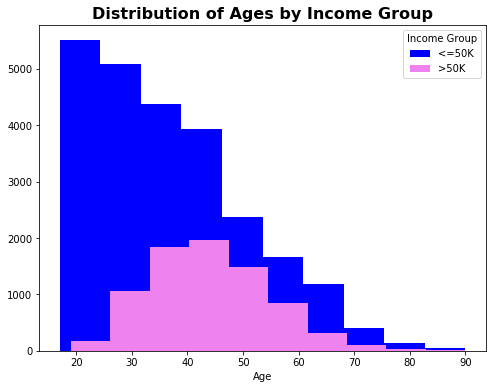

In [18]:
fig, axes = plt.subplots(figsize=(8,6))
axes.hist(adult_df[adult_df['income'] == '<=50K']['age'], color="blue")
axes.hist(adult_df[adult_df['income'] == '>50K']['age'], color="violet")
axes.set_title("Distribution of Ages by Income Group", fontsize=16, fontweight='bold')
axes.legend(['<=50K', '>50K'], title="Income Group")
axes.set_xlabel("Age");
#plt.figtext(.1, .01, 'Fig. 2: The age distribution of the <=50K class is right tailed while the for the <50K class it is uniform and centered around 45.');

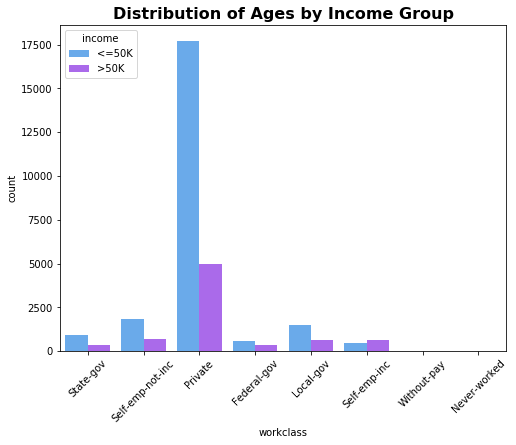

In [19]:
plt.figure(figsize=(8,6))
f=sns.countplot(x='workclass', hue='income', data=adult_df, palette='cool')
_ = plt.setp(f.get_xticklabels(), rotation=45)  # Rotate labels
plt.title("Distribution of Ages by Income Group", fontsize=16, fontweight='bold');
#plt.figtext(0.1, -0.11, 'Fig. 3: The majority of subjects in each income class are in the private workclass. The workclasses Without-pay and Never-worked counts are insignificant.');

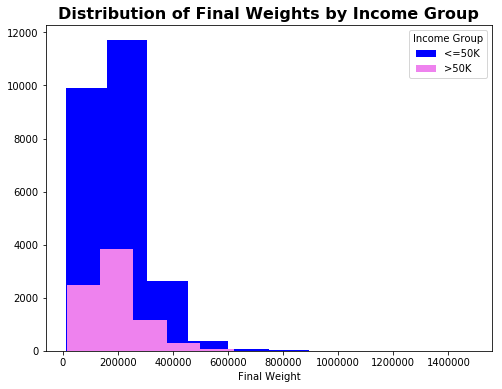

In [20]:
fig, axes = plt.subplots(figsize=(8,6))
axes.hist(adult_df[adult_df['income'] == '<=50K']['fnlwgt'], color="blue")
axes.hist(adult_df[adult_df['income'] == '>50K']['fnlwgt'], color="violet")
axes.set_title("Distribution of Final Weights by Income Group", fontsize=16, fontweight='bold')
axes.legend(['<=50K', '>50K'], title="Income Group")
axes.set_xlabel("Final Weight");
#plt.figtext(.1, .01, 'Fig. 4: Distribution of the final weight is right tailed.');

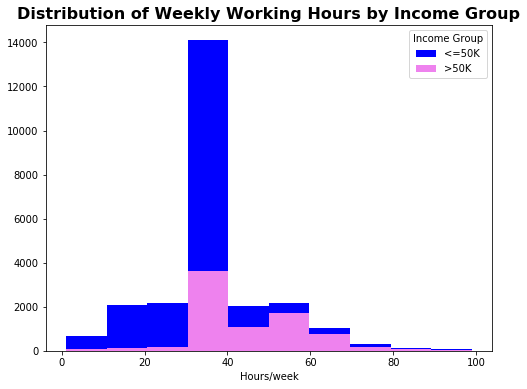

In [21]:
fig, axes = plt.subplots(figsize=(8,6))
axes.hist(adult_df[adult_df['income'] == '<=50K']['hours_week'], color="blue")
axes.hist(adult_df[adult_df['income'] == '>50K']['hours_week'], color="violet")
axes.set_title("Distribution of Weekly Working Hours by Income Group", fontsize=16, fontweight='bold')
axes.legend(['<=50K', '>50K'], title="Income Group")
axes.set_xlabel("Hours/week");

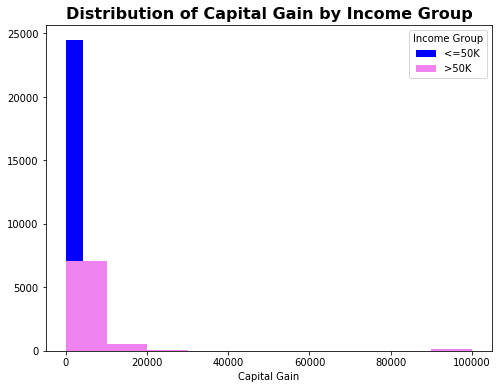

In [22]:
fig, axes = plt.subplots(figsize=(8,6))
axes.hist(adult_df[adult_df['income'] == '<=50K']['capital_gain'], color="blue")
axes.hist(adult_df[adult_df['income'] == '>50K']['capital_gain'], color="violet")
axes.set_title("Distribution of Capital Gain by Income Group", fontsize=16, fontweight='bold')
axes.legend(['<=50K', '>50K'], title="Income Group")
axes.set_xlabel("Capital Gain");

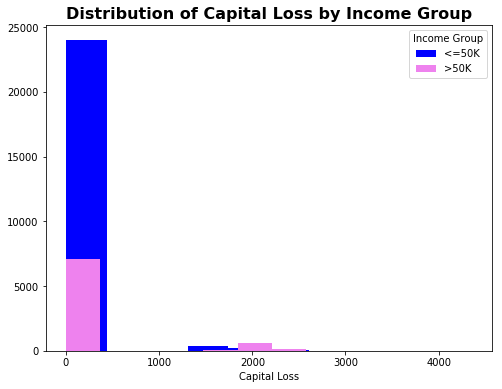

In [23]:
fig, axes = plt.subplots(figsize=(8,6))
axes.hist(adult_df[adult_df['income'] == '<=50K']['capital_loss'], color="blue")
axes.hist(adult_df[adult_df['income'] == '>50K']['capital_loss'], color="violet")
axes.set_title("Distribution of Capital Loss by Income Group", fontsize=16, fontweight='bold')
axes.legend(['<=50K', '>50K'], title="Income Group")
axes.set_xlabel("Capital Loss");

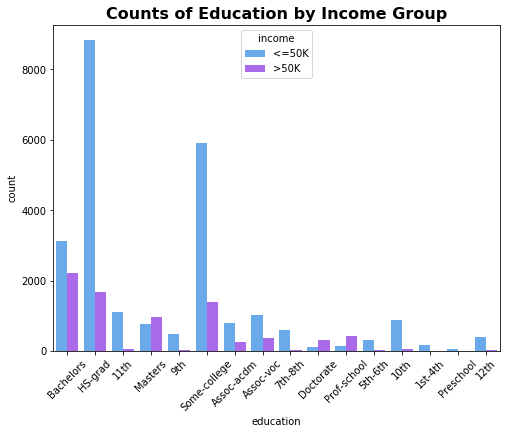

In [24]:
plt.figure(figsize=(8,6))
f=sns.countplot(x='education', hue='income', data=adult_df, palette='cool')
_ = plt.setp(f.get_xticklabels(), rotation=45)  # Rotate labels
plt.title("Counts of Education by Income Group", fontsize=16, fontweight='bold');

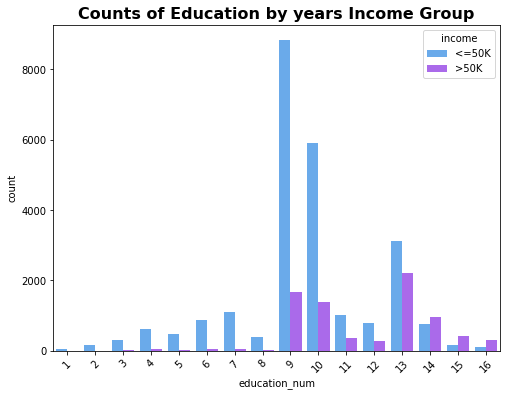

In [25]:
plt.figure(figsize=(8,6))
f=sns.countplot(x='education_num', hue='income', data=adult_df, palette='cool')
_ = plt.setp(f.get_xticklabels(), rotation=45)  # Rotate labels
plt.title("Counts of Education by years Income Group", fontsize=16, fontweight='bold');

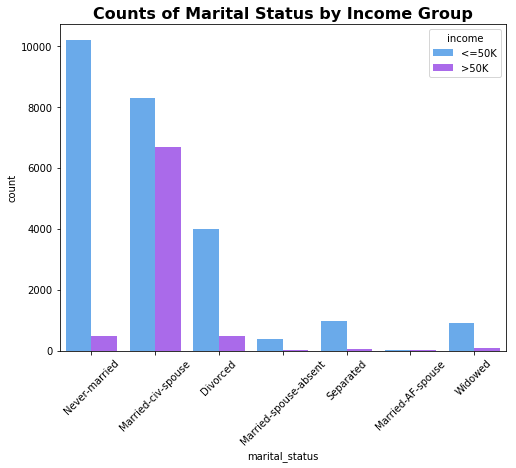

In [26]:
plt.figure(figsize=(8,6))
f=sns.countplot(x='marital_status', hue='income', data=adult_df, palette='cool')
_ = plt.setp(f.get_xticklabels(), rotation=45)  # Rotate labels
plt.title("Counts of Marital Status by Income Group", fontsize=16, fontweight='bold');

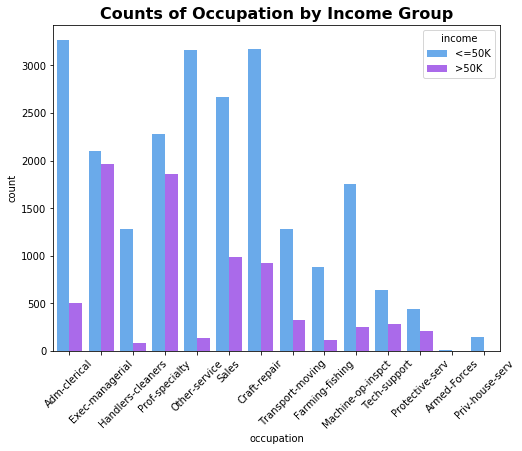

In [27]:
plt.figure(figsize=(8,6))
f=sns.countplot(x='occupation', hue='income', data=adult_df, palette='cool')
_ = plt.setp(f.get_xticklabels(), rotation=45)  # Rotate labels
plt.title("Counts of Occupation by Income Group", fontsize=16, fontweight='bold');

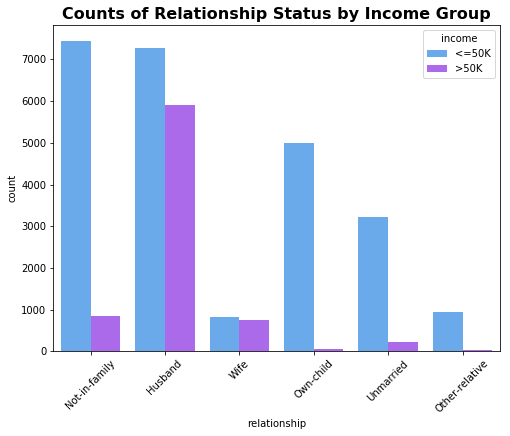

In [28]:
plt.figure(figsize=(8,6))
f=sns.countplot(x='relationship', hue='income', data=adult_df, palette='cool')
_ = plt.setp(f.get_xticklabels(), rotation=45)  # Rotate labels
plt.title("Counts of Relationship Status by Income Group", fontsize=16, fontweight='bold');

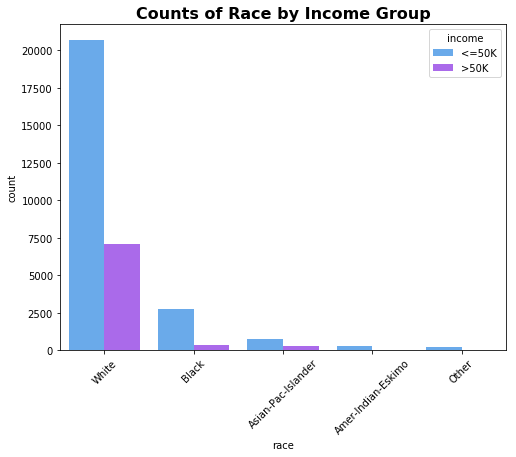

In [29]:
plt.figure(figsize=(8,6))
f=sns.countplot(x='race', hue='income', data=adult_df, palette='cool')
_ = plt.setp(f.get_xticklabels(), rotation=45)  # Rotate labels
plt.title("Counts of Race by Income Group", fontsize=16, fontweight='bold');

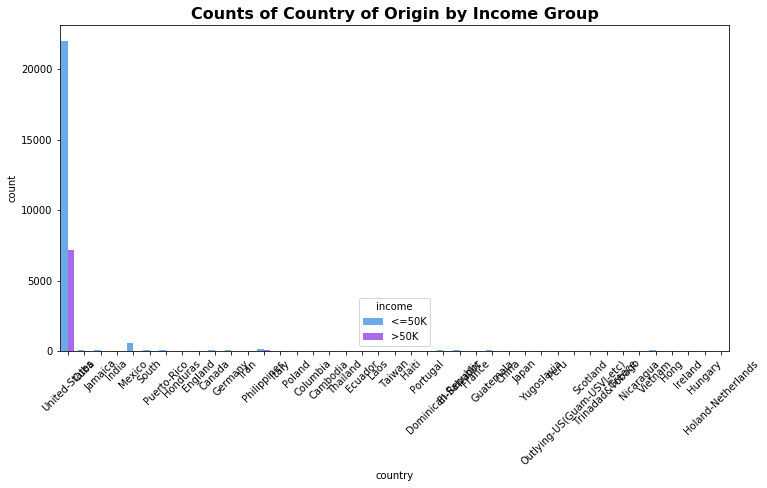

In [30]:
plt.figure(figsize=(12,6))
f=sns.countplot(x='country', hue='income', data=adult_df, palette='cool')
_ = plt.setp(f.get_xticklabels(), rotation=45)  # Rotate labels
plt.title("Counts of Country of Origin by Income Group", fontsize=16, fontweight='bold');

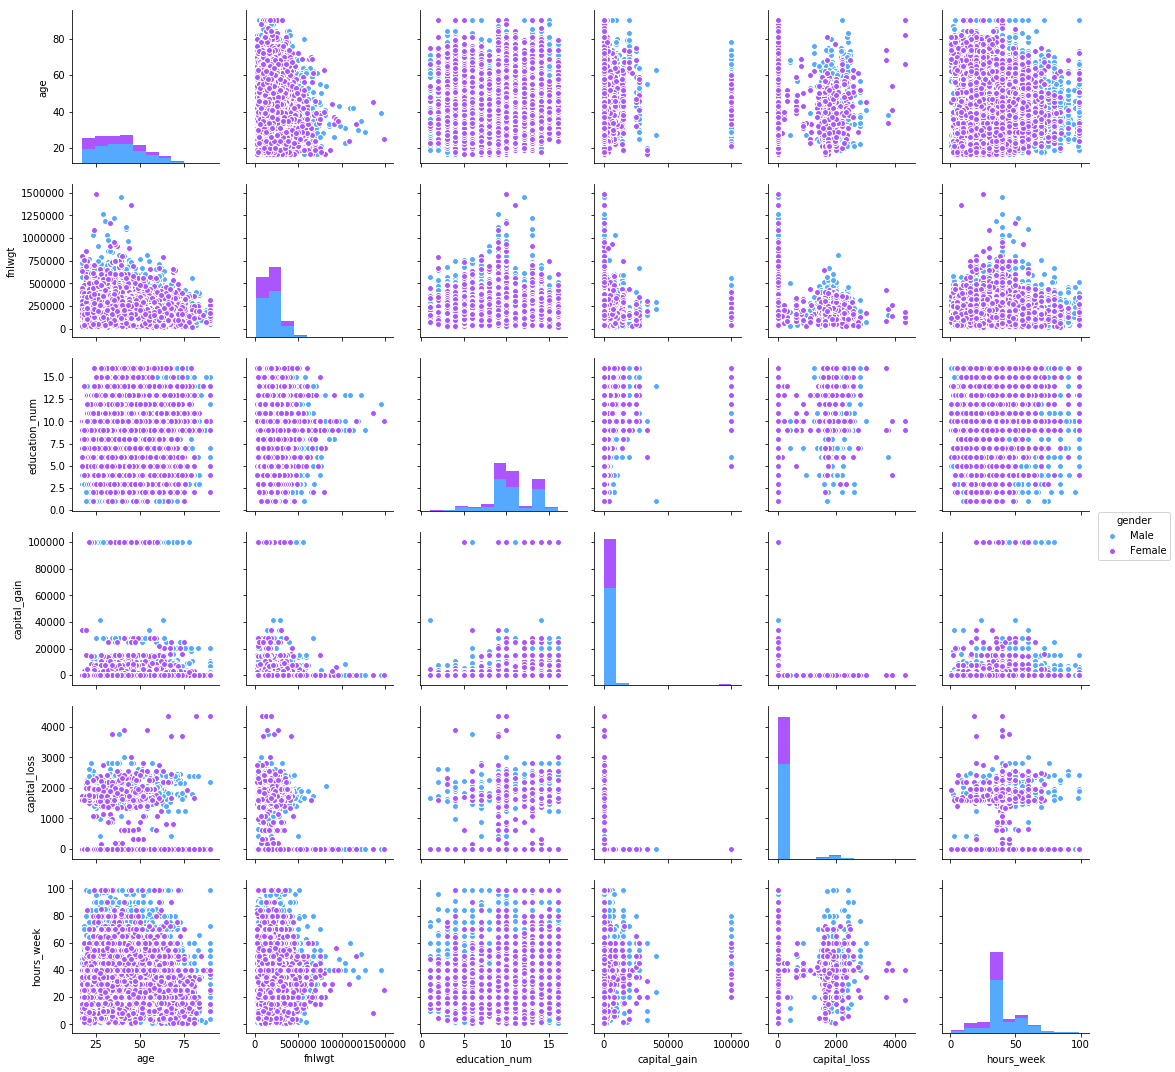

In [31]:
sns.pairplot(adult_df,hue='gender',palette='cool')

In [32]:
print(obj_col,'\n')
for col in obj_col:
    print(col)
    print((adult_df[col].value_counts()/nrow)*100,'\n') # displaying value counts in percentage in percentage

['gender', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'country', 'income'] 

gender
Male      66.920549
Female    33.079451
Name: gender, dtype: float64 

workclass
Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64 

education
HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64 

marital_status
Married-civ-spouse       45.993673
Never-marrie

## Conclusions drawn from EDA:

1. The majority of the individuals in the data are white, Male, work in the US (may be or may be not at the same time). 
2. The majority of the observations are for individuals making below the earning mark of 50k (the ratio is a little over 3:1)
3. Approximately third of the observations are for individuals holding a Highschool diploma and almost half hold a bachelor or 
   higher academic degree.
4. More than two thirds of the observations are for individuals working in the private sector.
5. The mean of the age of the individuals in the data is 38 years and the majority (75%) is 48 years old or younger.
6. The mean and the median of the number of working hours per week is almost identical, ca. 40 hrs/week. The majority (75%)
   works 45 hours or less per week.
7. More than third the indivduals in the data have the marital status 'Married', with the family role 'Husband'.
8. Most of the object columns, i.e. categorical predictors, have levels that can be binned. For example, the native country is mostly 'United-States' and hence can be binned to 'US' and 'non-US'. Same goes for education, race, workclass and marital status.
9. Most of the values in capital gain and capital loss are zero. These two columns may not add a lot information/prediction value to the model.
10. Some of the numerical columns can be binned as well, like education-num and working-hours, since they are discrete. 
 

# Step 4: Data Cleaning 

In [33]:
# We will start by binning the country country into US and non_US

adult_df.loc[(adult_df['country']!='United-States') & (adult_df['country'].notna()), 'country']='not_US'
adult_df.loc[(adult_df['country']=='United-States'), 'country']='US'

In [34]:
print(adult_df['country'].value_counts()) #check

US        29170
not_US     2808
Name: country, dtype: int64


In [35]:
sum(adult_df['country'].isnull()) #check

583

In [36]:
# Next we bin the race column. Since race is mostly white (85%), then it can be binned to 'white' and 'not_white'

race_dict = {'Black': 'not_White', 'Asian-Pac-Islander': 'not_White',
             'Other': 'not_White', 'Amer-Indian-Eskimo': 'not_White'}

adult_df['race']=adult_df['race'].replace(race_dict.keys(), race_dict.values())

In [37]:
print(adult_df['race'].value_counts()) #check

White        27816
not_White     4745
Name: race, dtype: int64


In [38]:
# Next we bin the education columns. It can be well represented as 'below_hs', 'hs', 'assoc', 'below_grad' and 'grad'

education_dict = {'Preschool': 'below_hs', '1st-4th': 'below_hs', '5th-6th': 'below_hs', '7th-8th': 
                  'below_hs', '9th': 'below_hs', '10th': 'below_hs', 
                  '11th': 'below_hs', '12th': 'below_hs', 'HS-grad': 'hs', 'Assoc-voc': 'assoc', 'Assoc-acdm': 'assoc', 'Prof-school': 'assoc',
                  'Some-college': 'below_grad', 'Bachelors': 'grad', 'Masters':  'grad', 'Doctorate': 'grad'}

adult_df['education'] =adult_df['education'].replace(education_dict.keys(), education_dict.values())
#_ =adult_df['education'].replace(education_dict.keys(), education_dict.values()) #check
print(adult_df['education'].value_counts()) #check
#print(_.value_counts())# check

hs            10501
grad           7491
below_grad     7291
below_hs       4253
assoc          3025
Name: education, dtype: int64


In [39]:
# Next we bin the education_num, which is the number of education years (definitely correlated with the education column) 
# into 4 year bins.

edun_dict = {1: '1-4', 2: '1-4', 3: '1-4', 4: '1-4', 5: '5-8', 6: '5-8',
             7: '5-8', 8: '5-8', 9: '9-12', 10: '9-12', 11: '9-12', 12: '9-12',
             13: '13-16', 14: '13-16', 15: '13-16', 16: '13-16'}

#_ =adult_df['education_num'].replace(edun_dict.keys(), edun_dict.values()) #check
adult_df['education_num']=adult_df['education_num'].replace(edun_dict.keys(), edun_dict.values())
print(adult_df['education_num'].value_counts())# check

9-12     20241
13-16     8067
5-8       3055
1-4       1198
Name: education_num, dtype: int64


In [60]:
# Next we bin the weekly working hours column, mainly because its distribution is concentrated around a mean of 40-45. 
# 35-40 hrs will be 'full_time', <35 will be 'part_time'  and >40 will be 'over_time'.

adult_df['weekly_hours'] = np.nan
adult_df.loc[(adult_df['hours_week']>=35) | (adult_df['hours_week']<=40), 'weekly_hours'] = 'full_time'
adult_df.loc[adult_df['hours_week']<35, 'weekly_hours'] = 'part_time'
adult_df.loc[adult_df['hours_week']>40, 'weekly_hours'] = 'over_time'
print(adult_df['weekly_hours'].value_counts())# check
del adult_df['hours_week']

full_time    17391
over_time     9577
part_time     5572
Name: weekly_hours, dtype: int64


In [50]:
# Next we bin the workclass column. First, we can remove the 'without-pay' and 'never-worked' because they carry no
# info on earning.

drop_ind=adult_df.loc[(adult_df.workclass=='Without-pay') | (adult_df.workclass=='Never-worked'), :].index #indices of rows to 
#drop
adult_df.drop(drop_ind, inplace=True) # by default, axis=0 and that means remove indicated rows in drop_ind

# Then we bin some of the smaller related groups togther. 

class_dict = {'Local-gov': 'gov', 'State-gov': 'gov', 'Federal-gov': 'gov',
              'Self-emp-not-inc': 'self_employed', 'Self-emp-inc': 'self_employed', 'Private': 'private'}

#_ =adult_df['workclass'].replace(class_dict.keys(), class_dict.values()) #check
#print(_.value_counts())# check
adult_df['workclass']=adult_df['workclass'].replace(class_dict.keys(), class_dict.values())
print(adult_df['workclass'].value_counts())# check

private          22696
gov               4351
self_employed     3657
Name: workclass, dtype: int64


In [51]:
print((adult_df['marital_status'].value_counts()/nrow)*100,'\n')

Married-civ-spouse       45.966033
Never-married            32.781548
Divorced                 13.642087
Separated                 3.147938
Widowed                   3.046589
Married-spouse-absent     1.280673
Married-AF-spouse         0.070637
Name: marital_status, dtype: float64 



In [55]:
# Next we bin the marital_status column. We can bin into 'married', 'never_married', 'sep_div' and 'widowed'.

marital_dict = {'Married-civ-spouse': 'married', 'Married-spouse-absent': 'married',
                'Married-AF-spouse': 'married', 'Divorced': 'sep_div', 'Separated': 'sep_div', 'Widowed': 'widowed',
                'Never-married': 'never_married'}
#_ =adult_df['marital_status'].replace(marital_dict.keys(), marital_dict.values()) #check
adult_df['marital_status'] =adult_df['marital_status'].replace(marital_dict.keys(), marital_dict.values()) #check
print(adult_df['marital_status'].value_counts())# check

married          15407
never_married    10674
sep_div           5467
widowed            992
Name: marital_status, dtype: int64


In [58]:
# Finally we bin occupation. Armed Forces binned with Protective-Service because there are only 9 subjects in the military. 

occup_dict = {'Armed-Forces': 'Protective-Military', 'Protective-serv': 'Protective-Military'}
adult_df['occupation'] =adult_df['occupation'].replace(occup_dict.keys(), occup_dict.values()) #check
print(adult_df['occupation'].value_counts())# check

Prof-specialty         4140
Craft-repair           4098
Exec-managerial        4066
Adm-clerical           3767
Sales                  3650
Other-service          3294
Machine-op-inspct      2001
Transport-moving       1596
Handlers-cleaners      1369
Farming-fishing         988
Tech-support            928
Protective-Military     658
Priv-house-serv         149
Name: occupation, dtype: int64


In [61]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32540 entries, 0 to 32560
Data columns (total 15 columns):
age               32540 non-null int64
workclass         30704 non-null object
fnlwgt            32540 non-null int64
education         32540 non-null object
education_num     32540 non-null object
marital_status    32540 non-null object
occupation        30704 non-null object
relationship      32540 non-null object
race              32540 non-null object
gender            32540 non-null object
capital_gain      32540 non-null int64
capital_loss      32540 non-null int64
country           31957 non-null object
income            32540 non-null object
weekly_hours      32540 non-null object
dtypes: int64(4), object(11)
memory usage: 5.2+ MB


In [62]:
adult_df_copy = adult_df.copy()

In [63]:
adult_df_copy.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,country,income,weekly_hours
0,39,gov,77516,grad,13-16,never_married,Adm-clerical,Not-in-family,White,Male,2174,0,US,<=50K,full_time
1,50,self_employed,83311,grad,13-16,married,Exec-managerial,Husband,White,Male,0,0,US,<=50K,part_time
2,38,private,215646,hs,9-12,sep_div,Handlers-cleaners,Not-in-family,White,Male,0,0,US,<=50K,full_time
3,53,private,234721,below_hs,5-8,married,Handlers-cleaners,Husband,not_White,Male,0,0,US,<=50K,full_time
4,28,private,338409,grad,13-16,married,Prof-specialty,Wife,not_White,Female,0,0,not_US,<=50K,full_time


# Step 5: Data Pre-processing

In [73]:
income_dummies = pd.get_dummies(adult_df['income'], prefix='income', drop_first=True) #income dummy variable
adult_df = pd.concat([adult_df, income_dummies], axis=1)
del adult_df['income']

In [75]:
workclass_dummies= pd.get_dummies(adult_df['workclass'], prefix='workclass', drop_first=True, dummy_na=True) #workclass dummies 
# the dummy_na attribute is set to True to keep a column that indicates NaNs
adult_df = pd.concat([adult_df, workclass_dummies], axis=1)
del adult_df['workclass']

In [77]:
edu_dummies= pd.get_dummies(adult_df['education'], prefix='edu', drop_first=True) #education classes dummies
adult_df = pd.concat([adult_df, edu_dummies], axis=1)
del adult_df['education']

In [79]:
edu_yrs_dummies= pd.get_dummies(adult_df['education_num'], prefix='edu_yrs', drop_first=True) #education years dummies
adult_df = pd.concat([adult_df, edu_yrs_dummies], axis=1)
del adult_df['education_num']

In [81]:
marital_dummies= pd.get_dummies(adult_df['marital_status'], prefix='marital', drop_first=True) #marital status dummies
adult_df = pd.concat([adult_df, marital_dummies], axis=1)
del adult_df['marital_status']

In [83]:
occup_dummies= pd.get_dummies(adult_df['occupation'], prefix='occup', drop_first=True, dummy_na=True) #occupation dummies
adult_df = pd.concat([adult_df, occup_dummies], axis=1)
del adult_df['occupation']

In [85]:
relation_dummies= pd.get_dummies(adult_df['relationship'], prefix='relation', drop_first=True) #relationships dummies
adult_df = pd.concat([adult_df, relation_dummies], axis=1)
del adult_df['relationship']

In [87]:
race_dummies= pd.get_dummies(adult_df['race'], prefix='race', drop_first=True) #race dummies
adult_df = pd.concat([adult_df, race_dummies], axis=1)
del adult_df['race']

In [89]:
gender_dummies= pd.get_dummies(adult_df['gender'], prefix='gender', drop_first=True) #gender dummy variable
adult_df = pd.concat([adult_df, gender_dummies], axis=1)
del adult_df['gender']

In [91]:
country_dummies= pd.get_dummies(adult_df['country'], prefix='country', drop_first=True, dummy_na=True) #country dummy variable
adult_df = pd.concat([adult_df, country_dummies], axis=1)
del adult_df['country']

In [93]:
hours_dummies= pd.get_dummies(adult_df['weekly_hours'], prefix='hours', drop_first=True) #work hours classes' dummies
adult_df = pd.concat([adult_df, hours_dummies], axis=1)
del adult_df['weekly_hours']

In [95]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32540 entries, 0 to 32560
Data columns (total 42 columns):
age                          32540 non-null int64
fnlwgt                       32540 non-null int64
capital_gain                 32540 non-null int64
capital_loss                 32540 non-null int64
income_>50K                  32540 non-null uint8
workclass_private            32540 non-null uint8
workclass_self_employed      32540 non-null uint8
workclass_nan                32540 non-null uint8
edu_below_grad               32540 non-null uint8
edu_below_hs                 32540 non-null uint8
edu_grad                     32540 non-null uint8
edu_hs                       32540 non-null uint8
edu_yrs_13-16                32540 non-null uint8
edu_yrs_5-8                  32540 non-null uint8
edu_yrs_9-12                 32540 non-null uint8
marital_never_married        32540 non-null uint8
marital_sep_div              32540 non-null uint8
marital_widowed              32540 non-nu

# Step 6: Modeling using Logistic Regression

In [100]:
#Splitting data into a training and test set (test set = 30%) and fitting a baseline model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adult_df.loc[:, adult_df.columns != 'income_>50K'],
                                                    adult_df.loc[:, 'income_>50K'], test_size=.30,
                                                    random_state=1234)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10, scoring='accuracy') # running k=10 folds cross-validation

In [99]:
print(scores)
print(scores.mean())

[0.7928007  0.79323968 0.80553117 0.80114135 0.79236172 0.7976295
 0.7928007  0.79806848 0.79139218 0.79754062]
0.7962506116245095


In [101]:
base_log = LogisticRegression()
base_log.fit(X_train, y_train)
base_predictions = base_log.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, base_predictions))

0.7978897766851055


In [103]:
print(confusion_matrix(y_test, base_predictions))

[[7138  291]
 [1682  651]]


In [104]:
print(classification_report(y_test, base_predictions))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88      7429
          1       0.69      0.28      0.40      2333

avg / total       0.78      0.80      0.76      9762

